In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv("Company_Data.csv")

In [8]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
df.shape

(400, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
df.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

In [12]:
df.value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US 
16.27  141        60      19           319         92     Good       44   11         Yes    Yes    1
6.15   146        68      12           328         132    Bad        51   14         Yes    Yes    1
5.94   138        83      0            139         134    Medium     54   18         Yes    No     1
5.97   112        24      0            164         101    Medium     45   11         Yes    No     1
5.98   124        56      11           447         134    Medium     53   12         No     Yes    1
                                                                                                  ..
8.70   150        84      9            432         134    Medium     64   15         Yes    No     1
8.71   149        95      5            400         144    Medium     76   18         No     No     1
8.73   129        76      16           58          121    Medium     69   12         Yes    Yes 

In [13]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [14]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [15]:
lb = LabelEncoder()

In [16]:
df["Urban"] = lb.fit_transform(df["Urban"])

In [17]:
df["US"] = lb.fit_transform(df["US"])

In [18]:
df = pd.get_dummies(df,columns=['ShelveLoc'],drop_first=True)

In [19]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0


In [23]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.705000,0.645000,0.212500,0.547500
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.456614,0.479113,0.409589,0.498362
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,1.000000,1.000000,0.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,1.000000,1.000000,0.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000,1.000000,1.000000


Sales on the basis of US

<AxesSubplot:xlabel='US', ylabel='Sales'>

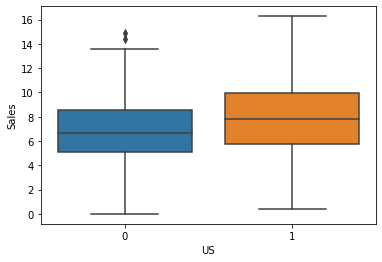

In [84]:
sns.boxplot(x=df["US"],y=df["Sales"])

Sales based on Urban

<AxesSubplot:xlabel='Urban', ylabel='count'>

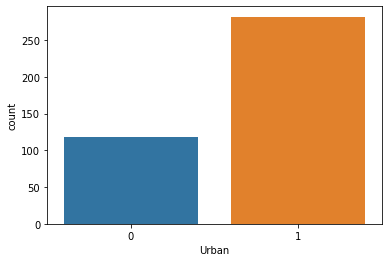

In [87]:
sns.countplot(x=df["Urban"])

<AxesSubplot:xlabel='Urban', ylabel='Sales'>

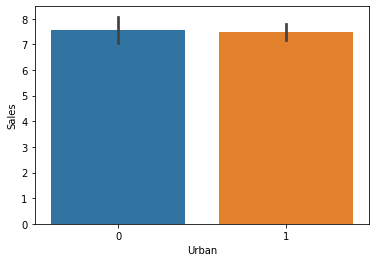

In [91]:
sns.barplot(x=df["Urban"],y=df["Sales"])

<AxesSubplot:xlabel='Urban', ylabel='Sales'>

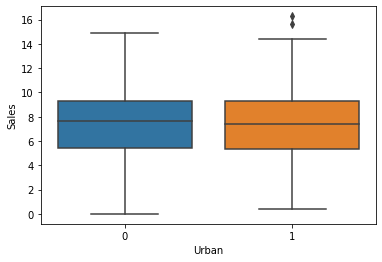

In [92]:
sns.boxplot(x=df["Urban"], y=df["Sales"])

# Category of Sales based on US and Urban whether Business is in US or Urban or Not

Check Sale when store is in US.What will be minimum Sales. MIN=(0.370000) and MAX=(16.270000)

Here 1 means in US and 0 means not in US

In [38]:
df[(df["US"] == 1) & (df["Sales"])].describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.0,258.000000,258.000000
mean,7.866899,125.166667,70.515504,10.007752,271.453488,116.810078,53.426357,13.748062,0.720930,1.0,0.236434,0.523256
std,2.877131,14.971547,27.979456,5.917061,144.436459,22.593489,15.571737,2.665987,0.449414,0.0,0.425718,0.500430
min,0.370000,85.000000,21.000000,0.000000,12.000000,55.000000,25.000000,10.000000,0.000000,1.0,0.000000,0.000000
25%,5.762500,115.250000,45.000000,5.000000,148.250000,101.000000,41.250000,11.000000,0.000000,1.0,0.000000,0.000000
50%,7.790000,125.000000,70.000000,10.000000,281.500000,118.000000,54.500000,14.000000,1.000000,1.0,0.000000,1.000000
75%,9.987500,135.000000,93.000000,14.000000,397.500000,131.000000,66.000000,16.000000,1.000000,1.0,0.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.0,1.000000,1.000000


Check Sale when store is NOT in US.What will be minimum Sales. MIN=(0.160000) and MAX=(14.900000)

Check Sales in Urban Areas is it High or not

Here 1 is Urban here and 0 means not in Urban areas

In [40]:
df[(df["Urban"] == 1) & (df["Sales"])].describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.0,282.000000,282.000000,282.000000
mean,7.468191,125.634752,69.343972,6.815603,259.886525,116.514184,53.620567,13.843972,1.0,0.659574,0.202128,0.535461
std,2.836219,15.701778,27.270990,6.728177,144.614968,23.942877,15.982909,2.621520,0.0,0.474695,0.402301,0.499628
min,0.370000,77.000000,21.000000,0.000000,12.000000,24.000000,25.000000,10.000000,1.0,0.000000,0.000000,0.000000
25%,5.375000,116.000000,44.000000,0.000000,139.000000,101.000000,41.000000,12.000000,1.0,0.000000,0.000000,0.000000
50%,7.420000,125.000000,70.000000,5.000000,274.000000,118.000000,55.000000,14.000000,1.0,1.000000,0.000000,1.000000
75%,9.292500,136.000000,91.000000,12.000000,376.750000,131.750000,65.750000,16.000000,1.0,1.000000,0.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,508.000000,191.000000,80.000000,18.000000,1.0,1.000000,1.000000,1.000000


Check Sales that are not in Urban area

In [41]:
df[(df["Urban"] == 0) & (df["Sales"])].describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.000000
mean,7.628205,123.264957,67.384615,6.256410,275.982906,113.470085,52.384615,14.025641,0.0,0.615385,0.239316,0.572650
std,2.728234,14.348731,29.537482,6.470295,154.233085,22.170800,16.647381,2.634197,0.0,0.488597,0.428501,0.496822
min,0.160000,88.000000,21.000000,0.000000,10.000000,49.000000,25.000000,10.000000,0.0,0.000000,0.000000,0.000000
25%,5.560000,113.000000,41.000000,0.000000,144.000000,97.000000,39.000000,12.000000,0.0,0.000000,0.000000,0.000000
50%,7.700000,123.000000,67.000000,5.000000,270.000000,112.000000,53.000000,14.000000,0.0,1.000000,0.000000,1.000000
75%,9.340000,132.000000,90.000000,11.000000,408.000000,128.000000,67.000000,16.000000,0.0,1.000000,0.000000,1.000000
max,14.900000,154.000000,120.000000,24.000000,509.000000,163.000000,80.000000,18.000000,0.0,1.000000,1.000000,1.000000


Check when the Sales is NOt in US or Urban

In [39]:
df[(df["US"] == 0) & (df["Sales"])].describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000
mean,6.871418,124.524823,65.574468,0.510638,252.078014,113.446809,52.950355,14.170213,0.680851,0.0,0.170213,0.588652
std,2.546949,16.031924,27.656886,1.650182,152.638044,24.878397,17.262398,2.529702,0.467809,0.0,0.377159,0.493832
min,0.160000,77.000000,22.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.0,0.000000,0.000000
25%,5.080000,115.000000,39.000000,0.000000,112.000000,98.000000,38.000000,12.000000,0.000000,0.0,0.000000,0.000000
50%,6.680000,124.000000,67.000000,0.000000,243.000000,116.000000,54.000000,14.000000,1.000000,0.0,0.000000,1.000000
75%,8.540000,134.000000,84.000000,0.000000,400.000000,129.000000,65.000000,16.000000,1.000000,0.0,0.000000,1.000000
max,14.900000,159.000000,120.000000,11.000000,508.000000,166.000000,80.000000,18.000000,1.000000,0.0,1.000000,1.000000


Important Inferences🎄

# I did analysis when the Business Store is in US then the Sales are HIgh

# And the Business store is not US then the Sales are less as compared to IN US 

In [46]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0


In [ ]:
# Split data for train and test purpose

In [42]:
X=df.iloc[:,0:]

In [44]:
Y = df.iloc[:,9]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test = train_test_split(X,Y ,test_size=0.25,random_state=100)

In [52]:
x_train.shape

(300, 12)

In [53]:
y_train.shape

(300,)

In [50]:
x_test.shape

(100, 12)

In [51]:
y_test.shape

(100,)

# Building Decision Tree Classifier using Entropy Criteria¶

In [58]:
model=DecisionTreeClassifier(criterion="entropy")
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#PLot the decision tree

[Text(167.4, 163.07999999999998, 'X[9] <= 0.5\nentropy = 0.953\nsamples = 300\nvalue = [112, 188]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 112\nvalue = [112, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 188\nvalue = [0, 188]')]

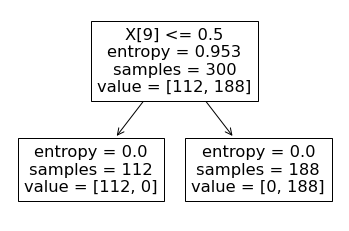

In [59]:
from sklearn import tree
tree.plot_tree(model)

In [60]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0


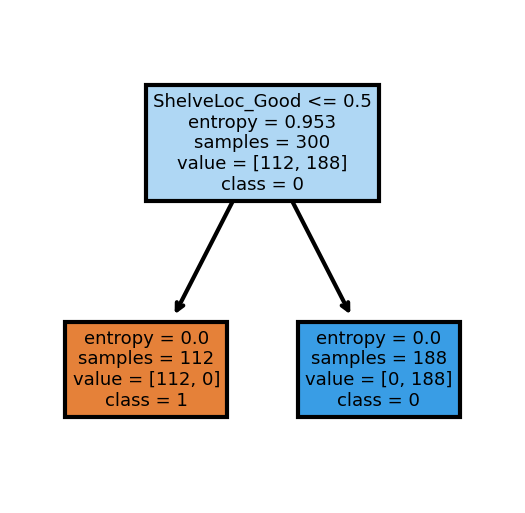

In [63]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban','ShelveLoc_Good','ShelveLoc_Medium']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [64]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    70
0    30
dtype: int64

In [66]:
y_test.value_counts()

1    70
0    30
Name: US, dtype: int64

completely correct prediction

In [67]:
pd.crosstab(y_test,preds) 

col_0,0,1
US,,
0,30,0
1,0,70


In [68]:
sum(preds==0)

30

In [69]:
sum(y_test==0)

30

In [70]:
# Accuracy 
np.mean(preds==y_test)

1.0

# Building Decision Tree Classifier (CART) using Gini Criteria

In [71]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [72]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [73]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

# Decision Tree Regression Example

# Here i will choose Urban as y

In [74]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0


In [ ]:
X=df.iloc[:,0:]

In [75]:
Y=df.iloc[:,8]

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [82]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [80]:
#Find the accuracy
model.score(X_test,y_test)

1.0

It gave 100% accuracy